### Table of Contents
- [1. Import Data](#1)<br>
- [2. Describe a Dataset](#2)<br>
- [3. Data Cleaning](#3)<br>
- [4. Modelling](#4)<br>
  - [4-1. Logistic Regression](#5)<br>
  - [4-2. Random Forests](#6)<br>
  - [4-3. Random Forests with Oversampling](#7)<br>
  - [4-4. Random Forests with Undersampling](#8)<br>
- [5. Save the Best Model](#9)

### Context

The dataset is from the U.S. Small Business Administration (SBA) <br>

The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. <br>

There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.tools 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### <a id = "1"> 1. Import Data</a>

In [8]:
df = pd.read_csv('SBAnational.csv')
pd.set_option('display.max_columns', 30)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


### <a id = "2"> 2. Describe a Dataset</a>

In [9]:
## Check the size of data
df.shape

(899164, 27)

In [10]:
## Null check
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [11]:
## Check data types
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [12]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


### <a id = "3"> 3. Data Cleaning</a>

In [13]:
## Make a copy of original df
sb_loan = df.copy()

In [14]:
## Drop columns that carry unuseful information
sb_loan = sb_loan.drop(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'ApprovalDate', 
         'FranchiseCode', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr'], axis=1)

sb_loan.head()

,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,451120,1997,84,4,2.0,0,0,0,N,Y,P I F,"$60,000.00","$48,000.00"
1,722410,1997,60,2,2.0,0,0,0,N,Y,P I F,"$40,000.00","$32,000.00"
2,621210,1997,180,7,1.0,0,0,0,N,N,P I F,"$287,000.00","$215,250.00"
3,0,1997,60,2,1.0,0,0,0,N,Y,P I F,"$35,000.00","$28,000.00"
4,0,1997,240,14,1.0,7,7,0,N,N,P I F,"$229,000.00","$229,000.00"


In [15]:
## Drop nulls
print(f'# of rows: {sb_loan.shape[0]}')
sb_loan.dropna(subset=['NewExist','RevLineCr','LowDoc','MIS_Status'], inplace=True)
print(f'# of rows: {sb_loan.shape[0]}')
print(sb_loan.isnull().sum())

# of rows: 899164
# of rows: 889938
NAICS          0
ApprovalFY     0
Term           0
NoEmp          0
NewExist       0
CreateJob      0
RetainedJob    0
UrbanRural     0
RevLineCr      0
LowDoc         0
MIS_Status     0
GrAppv         0
SBA_Appv       0
dtype: int64


Description of the first two digits of NAICS:

| Sector	| Description |
| --- | --- |
| 11 |	Agriculture, forestry, fishing and hunting |
| 21 |	Mining, quarrying, and oil and gas extraction|
|22 |	Utilities|
|23	|Construction|
|31–33	|Manufacturing|
|42|	Wholesale trade|
|44–45|	Retail trade|
|48–49|	Transportation and warehousing|
|51|	Information|
|52|	Finance and insurance|
|53|	Real estate and rental and leasing|
|54|	Professional, scientific, and technical services|
|55|	Management of companies and enterprises|
|56|	Administrative and support and waste management and remediation services|
|61|	Educational services|
|62|	Health care and social assistance|
|71|	Arts, entertainment, and recreation|
|72|	Accommodation and food services|
|81|	Other services (except public administration) |
|92| Public administration|

In [17]:
## NAICS: North American industry classification system code
## The first two digits represent which industry the business is in
print(sb_loan.NAICS.value_counts())
print("============================")

## Drop rows where the value of NAICS == 0
print(f"Before cleaning:\n{sb_loan.shape[0]}")

drop_idx = sb_loan[sb_loan.NAICS == 0].index
sb_loan = sb_loan.drop(drop_idx)

## Check
print(f"\nAfter cleaning:\n{sb_loan.shape[0]}")
print("============================")

## Take the first two digits and grouping
def NAICS(x):
    x = str(x)[:2]
    if x == '31' or x == '32' or x == '33':
        x = '31-33'
    elif x == '44' or x == '45':
        x = '44-45'
    elif x == '48' or x == '49':
        x = '48-49'
    return x
    
sb_loan.NAICS = sb_loan.NAICS.apply(NAICS)
print(sb_loan.NAICS.value_counts())

0         199482
722110     27823
722211     19364
811111     14429
621210     13913
           ...  
524192         1
212231         1
314992         1
315240         1
212324         1
Name: NAICS, Length: 1311, dtype: int64
Before cleaning:
889938

After cleaning:
690456
44-45    126145
81        71965
31-33     67379
54        67313
72        67189
23        65922
62        54856
42        48379
56        32253
48-49     22199
71        14497
53        13495
51        11254
52         9411
11         8900
61         6335
21         1829
22          656
55          256
92          223
Name: NAICS, dtype: int64


In [18]:
## NewExist, (1 = Existing business, 2 = New business)
print(sb_loan.NewExist.value_counts())
print("============================")

## Remove rows where values are 0.0
print(f'# of rows: {sb_loan.shape[0]}')
sb_loan.drop(sb_loan[sb_loan.NewExist == 0.0].index, inplace = True)
print(f'# of rows: {sb_loan.shape[0]}')

## Change datatype, from float to int
sb_loan.NewExist = sb_loan.NewExist.astype(int)

1.0    498467
2.0    191260
0.0       729
Name: NewExist, dtype: int64
# of rows: 690456
# of rows: 689727


In [19]:
## RevLineCr: Yes/No columns
## Check if the column has other values apart from yes or no
print(f'Before Cleaning:\n{sb_loan.RevLineCr.value_counts()}')

sb_loan = sb_loan[(sb_loan.RevLineCr == 'N') | (sb_loan.RevLineCr == 'Y')]
print(f'After Cleaning:\n{sb_loan.RevLineCr.value_counts()}')

Before Cleaning:
N    267411
0    214032
Y    193682
T     14557
1        14
R        14
`         5
2         5
C         2
Q         1
A         1
,         1
7         1
-         1
Name: RevLineCr, dtype: int64
After Cleaning:
N    267411
Y    193682
Name: RevLineCr, dtype: int64


In [20]:
## LowDoc: Yes/No columns
## Check if the column has other values apart from yes or no
print(f'Before Cleaning:\n{sb_loan.LowDoc.value_counts()}')

sb_loan = sb_loan[(sb_loan.LowDoc == 'N') | (sb_loan.LowDoc == 'Y')]
print(f'After Cleaning:\n{sb_loan.LowDoc.value_counts()}')

Before Cleaning:
N    434155
Y     25142
S       565
C       557
0       512
A       104
R        57
1         1
Name: LowDoc, dtype: int64
After Cleaning:
N    434155
Y     25142
Name: LowDoc, dtype: int64


In [21]:
## MIS_Status
print(f'before:\n{sb_loan.MIS_Status.value_counts()}')

sb_loan.MIS_Status = np.where(sb_loan.MIS_Status == 'CHGOFF', 1, 0)
print(f'after:\n{sb_loan.MIS_Status.value_counts()}')

before:
P I F     360762
CHGOFF     98535
Name: MIS_Status, dtype: int64
after:
0    360762
1     98535
Name: MIS_Status, dtype: int64


In [22]:
## Currency related columns
currency_cols = ['GrAppv', 'SBA_Appv']
for col in currency_cols:
    sb_loan[col] = sb_loan[col].str.replace('$', '').str.replace(',','')
    sb_loan[col] = sb_loan[col].astype(float)

sb_loan.head()

,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,44-45,1997,84,4,2,0,0,0,N,Y,0,60000.0,48000.0
1,72,1997,60,2,2,0,0,0,N,Y,0,40000.0,32000.0
2,62,1997,180,7,1,0,0,0,N,N,0,287000.0,215250.0
5,31-33,1997,120,19,1,0,0,0,N,N,0,517000.0,387750.0
7,81,1997,84,1,2,0,0,0,N,Y,0,45000.0,36000.0


In [25]:
sb_loan.ApprovalFY = sb_loan.ApprovalFY.astype(int)

In [29]:
## Datatype Double Check
sb_loan.dtypes

NAICS           object
ApprovalFY       int64
Term             int64
NoEmp            int64
NewExist         int64
CreateJob        int64
RetainedJob      int64
UrbanRural       int64
RevLineCr       object
LowDoc          object
MIS_Status       int64
GrAppv         float64
SBA_Appv       float64
dtype: object

In [26]:
## Label distribution
sb_loan.MIS_Status.value_counts()

0    360762
1     98535
Name: MIS_Status, dtype: int64

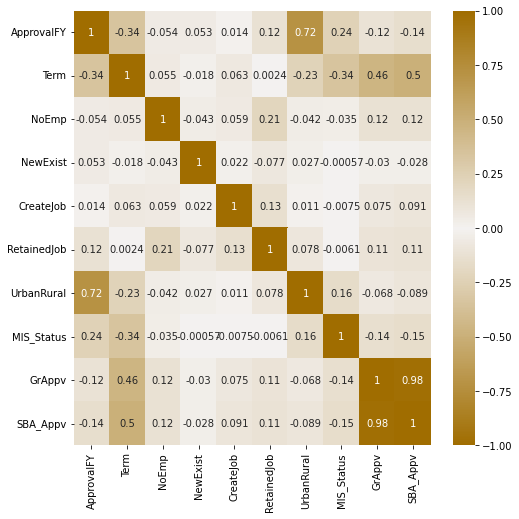

In [27]:
## Correlation
sym_col = sns.diverging_palette(50, 50, s=100, as_cmap=True)

plt.figure(figsize=(8,8))
sns.heatmap(sb_loan.corr(),annot=True, vmin=-1,vmax=1, center = 0, cmap=sym_col)
plt.show()

In [30]:
sb_loan

,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,44-45,1997,84,4,2,0,0,0,N,Y,0,60000.0,48000.0
1,72,1997,60,2,2,0,0,0,N,Y,0,40000.0,32000.0
2,62,1997,180,7,1,0,0,0,N,N,0,287000.0,215250.0
5,31-33,1997,120,19,1,0,0,0,N,N,0,517000.0,387750.0
7,81,1997,84,1,2,0,0,0,N,Y,0,45000.0,36000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,23,1997,60,5,1,0,0,0,Y,N,0,25000.0,12500.0
899146,31-33,1997,240,8,1,4,0,0,N,N,0,189000.0,189000.0
899157,31-33,1997,36,40,1,0,0,0,N,N,0,200000.0,150000.0
899160,44-45,1997,60,6,1,0,0,0,Y,N,0,85000.0,42500.0


### <a id = "4"> 4. Modelling</a>

In [31]:
fea_cols = list(sb_loan.columns)
fea_cols.remove('MIS_Status')

X = sb_loan[fea_cols]
y = sb_loan['MIS_Status']

#### <a id = "5"> 4-1. Logistic Regression</a>

In [32]:
sb_loan.head(2)

,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,44-45,1997,84,4,2,0,0,0,N,Y,0,60000.0,48000.0
1,72,1997,60,2,2,0,0,0,N,Y,0,40000.0,32000.0


In [33]:
## Feature engineering; NAICS
def feature_eng(df):
    df = pd.get_dummies(df, columns=['NAICS'],drop_first=True, prefix='NAICS')   
    df = pd.get_dummies(df, columns=['RevLineCr'],drop_first=True, prefix='RevLineCr')
    df = pd.get_dummies(df, columns=['LowDoc'],drop_first=True, prefix='LowDoc')
    df = sm.add_constant(df)

    return df

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=924)

In [35]:
X_train_eng = feature_eng(X_train)
X_train_eng.head(2)

,const,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,GrAppv,SBA_Appv,NAICS_21,NAICS_22,NAICS_23,NAICS_31-33,NAICS_42,...,NAICS_48-49,NAICS_51,NAICS_52,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,RevLineCr_Y,LowDoc_Y
235392,1.0,2007,84,1,2,0,1,1,10000.0,5000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
662319,1.0,2003,60,2,1,0,2,1,20000.0,10000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [36]:
log_reg = sm.Logit(y_train, X_train_eng).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.392148
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             MIS_Status   No. Observations:               344472
Model:                          Logit   Df Residuals:                   344441
Method:                           MLE   Df Model:                           30
Date:                Sat, 09 Oct 2021   Pseudo R-squ.:                  0.2457
Time:                        19:25:38   Log-Likelihood:            -1.3508e+05
converged:                       True   LL-Null:                   -1.7910e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -215.2204      2.920    -73.710      0.000    -220.943    -209.498
ApprovalFY      0.1078      0.001     73.792      0.000       0.105       0.111
Term           -0.0337      0.000   -192.317      0.000      -0.034      -0.033
NoEmp          -0.0129      0.001    -19.967      0.000      -0.014      -0.012
NewExist       -0.0611      0.011     -5.459      0.000      -0.083      -0.039
CreateJob       0.0012      0.000      3.711      0.000       0.001       0.002
RetainedJob    -0.0029      0.001     -3.795      0.000      -0.004      -0.001
UrbanRural     -0.0924      0.012     -7.759      0.000      -0.116      -0.069
GrAppv      -5.001e-07   1.61e-07     -3.110      0.002   -8.15e-07   -1.85e-07
SBA_Appv     2.124e-07   2.03e-07      1.048      0.295   -1.85e-07     6.1e-07
NAICS_21       -0.4013      0.131     -3.060      0.002      -0.658      -0.144
NAICS_22        0.7088      0.167      4.237      0.000       0.381       1.037
NAICS_23        0.7384      0.057     13.040      0.000       0.627       0.849
NAICS_31-33     0.5104      0.057      8.883      0.000       0.398       0.623
NAICS_42        0.6407      0.058     11.103      0.000       0.528       0.754
NAICS_44-45     1.0095      0.056     18.010      0.000       0.900       1.119
NAICS_48-49     0.6769      0.059     11.381      0.000       0.560       0.794
NAICS_51        0.8594      0.065     13.199      0.000       0.732       0.987
NAICS_52        1.1746      0.065     18.075      0.000       1.047       1.302
NAICS_53        1.3065      0.062     21.040      0.000       1.185       1.428
NAICS_54        0.6026      0.057     10.584      0.000       0.491       0.714
NAICS_55        0.9442      0.336      2.809      0.005       0.285       1.603
NAICS_56        0.7711      0.059     13.170      0.000       0.656       0.886
NAICS_61        0.9118      0.071     12.781      0.000       0.772       1.052
NAICS_62        0.1837      0.059      3.090      0.002       0.067       0.300
NAICS_71        1.0369      0.065     15.982      0.000       0.910       1.164
NAICS_72        1.1410      0.058     19.795      0.000       1.028       1.254
NAICS_81        0.9453      0.057     16.538      0.000       0.833       1.057
NAICS_92        0.7275      0.275      2.649      0.008       0.189       1.266
RevLineCr_Y    -0.5837      0.010    -56.604      0.000      -0.604      -0.563
LowDoc_Y       -1.2008      0.038    -31.911      0.000      -1.275      -1.127
===============================================================================
"""

In [37]:
## Feature engineering
## remove columns having p-value higher than 0.05
def feature_eng_rev(df):
    df = pd.get_dummies(df, columns=['NAICS'],drop_first=True, prefix='NAICS')
    df = pd.get_dummies(df, columns=['RevLineCr'],drop_first=True, prefix='RevLineCr')
    df = pd.get_dummies(df, columns=['LowDoc'],drop_first=True, prefix='LowDoc')
    df = df.drop(columns=['SBA_Appv'])
    df = sm.add_constant(df)

    return df

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=924)

X_train_eng = feature_eng_rev(X_train)
log_reg = sm.Logit(y_train, X_train_eng).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.392150
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             MIS_Status   No. Observations:               344472
Model:                          Logit   Df Residuals:                   344442
Method:                           MLE   Df Model:                           29
Date:                Sat, 09 Oct 2021   Pseudo R-squ.:                  0.2457
Time:                        19:25:54   Log-Likelihood:            -1.3508e+05
converged:                       True   LL-Null:                   -1.7910e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -215.0475      2.915    -73.762      0.000    -220.762    -209.333
ApprovalFY      0.1077      0.001     73.844      0.000       0.105       0.111
Term           -0.0337      0.000   -192.364      0.000      -0.034      -0.033
NoEmp          -0.0129      0.001    -20.006      0.000      -0.014      -0.012
NewExist       -0.0609      0.011     -5.441      0.000      -0.083      -0.039
CreateJob       0.0012      0.000      3.695      0.000       0.001       0.002
RetainedJob    -0.0030      0.001     -3.858      0.000      -0.004      -0.001
UrbanRural     -0.0927      0.012     -7.784      0.000      -0.116      -0.069
GrAppv      -3.351e-07   3.16e-08    -10.616      0.000   -3.97e-07   -2.73e-07
NAICS_21       -0.4030      0.131     -3.073      0.002      -0.660      -0.146
NAICS_22        0.7072      0.167      4.227      0.000       0.379       1.035
NAICS_23        0.7370      0.057     13.021      0.000       0.626       0.848
NAICS_31-33     0.5095      0.057      8.867      0.000       0.397       0.622
NAICS_42        0.6396      0.058     11.087      0.000       0.527       0.753
NAICS_44-45     1.0085      0.056     17.995      0.000       0.899       1.118
NAICS_48-49     0.6759      0.059     11.366      0.000       0.559       0.792
NAICS_51        0.8582      0.065     13.184      0.000       0.731       0.986
NAICS_52        1.1736      0.065     18.062      0.000       1.046       1.301
NAICS_53        1.3055      0.062     21.028      0.000       1.184       1.427
NAICS_54        0.6013      0.057     10.564      0.000       0.490       0.713
NAICS_55        0.9422      0.336      2.803      0.005       0.283       1.601
NAICS_56        0.7702      0.059     13.156      0.000       0.655       0.885
NAICS_61        0.9110      0.071     12.771      0.000       0.771       1.051
NAICS_62        0.1824      0.059      3.069      0.002       0.066       0.299
NAICS_71        1.0361      0.065     15.971      0.000       0.909       1.163
NAICS_72        1.1402      0.058     19.786      0.000       1.027       1.253
NAICS_81        0.9446      0.057     16.526      0.000       0.833       1.057
NAICS_92        0.7264      0.275      2.645      0.008       0.188       1.265
RevLineCr_Y    -0.5848      0.010    -57.019      0.000      -0.605      -0.565
LowDoc_Y       -1.2000      0.038    -31.896      0.000      -1.274      -1.126
===============================================================================
"""

In [39]:
X_train['y_pred'] = log_reg.predict(X_train_eng)
X_train['pred_binary'] = np.where(X_train['y_pred'] > 0.5 , 1, 0)
accuracy = accuracy_score(y_train, X_train['pred_binary'])

print(accuracy)

0.8171085022875589


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
X_test_eng = feature_eng_rev(X_test)

X_test['y_pred'] = log_reg.predict(X_test_eng)
X_test['pred_binary'] = np.where(X_test['y_pred'] > 0.5 , 1, 0)

accuracy = accuracy_score(y_test, X_test['pred_binary'])

print(accuracy)

0.8182538645765295


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
def produce_confusion(positive_label, negative_label, y_pred, y_real):
    
    #Build the CM
    cm = confusion_matrix(y_true, y_pred)  
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g'); 

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('Real labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Paid in Full', 'Default'])
    ax.yaxis.set_ticklabels(['Paid in Full', 'Default']);

    return None

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     90194
           1       0.63      0.36      0.46     24631

    accuracy                           0.82    114825
   macro avg       0.74      0.65      0.68    114825
weighted avg       0.80      0.82      0.80    114825



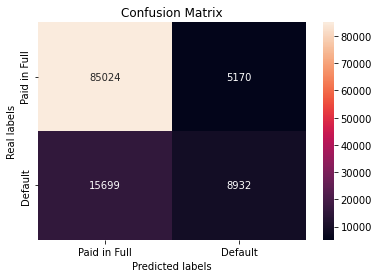

In [42]:
y_true = y_test
y_pred = X_test['pred_binary']

print(classification_report(y_test, y_pred))

## confusion matrix
produce_confusion(1, 0, y_pred, y_true)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     90194
           1       0.63      0.36      0.46     24631

    accuracy                           0.82    114825
   macro avg       0.74      0.65      0.68    114825
weighted avg       0.80      0.82      0.80    114825



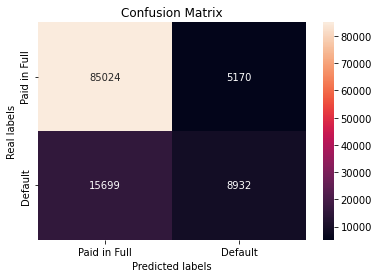

In [43]:
y_true = y_test
y_pred = X_test['pred_binary']

print(classification_report(y_test, y_pred))

## confusion matrix
produce_confusion(1, 0, y_pred, y_true)

In [44]:
## Feature engineering
## remove columns having p-value higher than 0.05
def feature_eng_rev(df):
    df = pd.get_dummies(df, columns=['NAICS'],drop_first=True, prefix='NAICS')
    df = pd.get_dummies(df, columns=['RevLineCr'],drop_first=True, prefix='RevLineCr')
    df = pd.get_dummies(df, columns=['LowDoc'],drop_first=True, prefix='LowDoc')
    df = df.drop(columns=['SBA_Appv', 'ApprovalFY'])
    df.GrAppv = np.log(df.GrAppv)
    #df.ApprovalFY = np.log(df.ApprovalFY)
    df = sm.add_constant(df)
    

    return df

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=924)

X_train_eng = feature_eng_rev(X_train)
log_reg = sm.Logit(y_train, X_train_eng).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.399668
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             MIS_Status   No. Observations:               344472
Model:                          Logit   Df Residuals:                   344443
Method:                           MLE   Df Model:                           28
Date:                Sat, 09 Oct 2021   Pseudo R-squ.:                  0.2313
Time:                        19:26:14   Log-Likelihood:            -1.3767e+05
converged:                       True   LL-Null:                   -1.7910e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6672      0.079     21.103      0.000       1.512       1.822
Term           -0.0333      0.000   -193.467      0.000      -0.034      -0.033
NoEmp          -0.0183      0.001    -27.975      0.000      -0.020      -0.017
NewExist       -0.0247      0.011     -2.233      0.026      -0.046      -0.003
CreateJob       0.0016      0.000      4.618      0.000       0.001       0.002
RetainedJob     0.0076      0.001     10.756      0.000       0.006       0.009
UrbanRural      0.3576      0.010     36.810      0.000       0.339       0.377
GrAppv         -0.1402      0.005    -28.491      0.000      -0.150      -0.131
NAICS_21       -0.2700      0.128     -2.104      0.035      -0.522      -0.018
NAICS_22        0.8701      0.165      5.286      0.000       0.547       1.193
NAICS_23        0.8911      0.055     16.123      0.000       0.783       0.999
NAICS_31-33     0.6433      0.056     11.459      0.000       0.533       0.753
NAICS_42        0.8080      0.056     14.339      0.000       0.698       0.918
NAICS_44-45     1.1237      0.055     20.549      0.000       1.017       1.231
NAICS_48-49     0.8844      0.058     15.214      0.000       0.770       0.998
NAICS_51        1.0444      0.064     16.369      0.000       0.919       1.170
NAICS_52        1.4006      0.064     21.985      0.000       1.276       1.525
NAICS_53        1.4911      0.061     24.560      0.000       1.372       1.610
NAICS_54        0.7965      0.056     14.338      0.000       0.688       0.905
NAICS_55        1.2555      0.336      3.735      0.000       0.597       1.914
NAICS_56        0.9238      0.057     16.143      0.000       0.812       1.036
NAICS_61        1.1283      0.070     16.085      0.000       0.991       1.266
NAICS_62        0.3664      0.058      6.311      0.000       0.253       0.480
NAICS_71        1.1923      0.064     18.773      0.000       1.068       1.317
NAICS_72        1.3733      0.056     24.405      0.000       1.263       1.484
NAICS_81        1.0810      0.056     19.374      0.000       0.972       1.190
NAICS_92        0.8282      0.273      3.038      0.002       0.294       1.363
RevLineCr_Y    -0.6082      0.010    -58.344      0.000      -0.629      -0.588
LowDoc_Y       -1.6635      0.037    -45.307      0.000      -1.735      -1.591
===============================================================================
"""

In [46]:
X_train['y_pred'] = log_reg.predict(X_train_eng)
X_train['pred_binary'] = np.where(X_train['y_pred'] > 0.5 , 1, 0)
accuracy = accuracy_score(y_train, X_train['pred_binary'])

print(accuracy)

0.8132097819271232


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
X_test_eng = feature_eng_rev(X_test)

X_test['y_pred'] = log_reg.predict(X_test_eng)
X_test['pred_binary'] = np.where(X_test['y_pred'] > 0.5 , 1, 0)

accuracy = accuracy_score(y_test, X_test['pred_binary'])

print(accuracy)

0.8133855867624646


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.84      0.94      0.89     90194
           1       0.62      0.34      0.44     24631

    accuracy                           0.81    114825
   macro avg       0.73      0.64      0.66    114825
weighted avg       0.79      0.81      0.79    114825



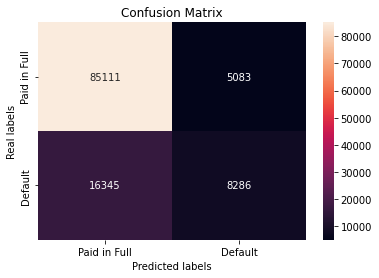

In [48]:
y_true = y_test
y_pred = X_test['pred_binary']

print(classification_report(y_test, y_pred))

## confusion matrix
produce_confusion(1, 0, y_pred, y_true)

Label distribution <br>
- <b>0</b>, paid in full:    360762 
- <b>1</b>, default (charged off):     98535 

As the data has imbalanced labels, our model tends to produce lots of false negatives (predict 0 for the data entry with a real label of 1), which leads to poor recall, 0.33.

#### <a id = "6"> 4-2. Random Forests</a>

In [49]:
## Feature engineering
## remove columns having p-value higher than 0.05
def feature_eng_rf(df):
    df = pd.get_dummies(df, columns=['NAICS'],drop_first=True, prefix='NAICS')
    df = pd.get_dummies(df, columns=['RevLineCr'],drop_first=True, prefix='RevLineCr')
    df = pd.get_dummies(df, columns=['LowDoc'],drop_first=True, prefix='LowDoc')
    df = df.drop(columns=['SBA_Appv'])

    return df

In [50]:
rf = RandomForestClassifier(n_estimators=50)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=924)

X_train_eng = feature_eng_rf(X_train)

rf.fit(X_train_eng, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
rf.score(X_train_eng, y_train)

0.9984875403516106

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     90194
           1       0.87      0.81      0.84     24631

    accuracy                           0.93    114825
   macro avg       0.91      0.89      0.90    114825
weighted avg       0.93      0.93      0.93    114825



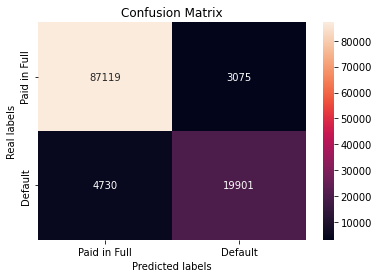

In [53]:
X_test_eng = feature_eng_rf(X_test)

## predict on the test set
rf_pred = rf.predict(X_test_eng)

print(classification_report(y_test, rf_pred))

produce_confusion(1, 0, rf_pred, y_test)

In [ ]:
## parameters tuning
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 3, 5],
    'min_samples_split': [5, 10]
}

grid_cv = GridSearchCV(rf, param_grid=rf_params, cv=5)
grid_cv.fit(X_train_eng, y_train)

print(f'best accuracy: {grid_cv.best_score_}')
print(f'best parameters: {grid_cv.best_params_}')

best accuracy: 0.9344058991117814
best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
grid_cv.score(X_train_eng, y_train)

0.9640355287414111

In [54]:
## Retrain the model with the best parameters
rf_best = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, min_samples_split=5)

In [55]:
rf_best.fit(X_train_eng, y_train)

print(rf_best.score(X_train_eng, y_train))

0.9670771499570356


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     90194
           1       0.87      0.82      0.84     24631

    accuracy                           0.93    114825
   macro avg       0.91      0.89      0.90    114825
weighted avg       0.93      0.93      0.93    114825



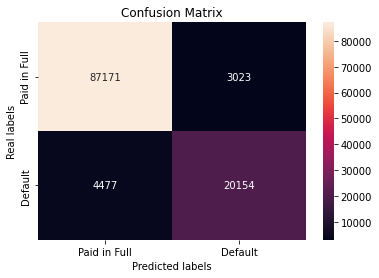

In [56]:
X_test_eng = feature_eng_rf(X_test)

## predict on the test set
rf_best_pred = rf_best.predict(X_test_eng)

print(classification_report(y_test, rf_best_pred))

produce_confusion(1, 0, rf_best_pred, y_test)

In [ ]:
y_score = rf_best.predict_proba(X_test_eng)[:,1]

fp, tp, thresh = roc_curve(y_test, y_score)
print(f'roc_auc_score for random forests: {roc_auc_score(y_test, y_score)}')

roc_auc_score for random forests: 0.9701000704811065


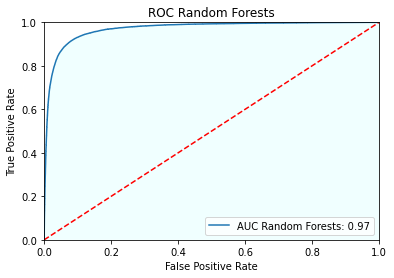

In [ ]:
plt.plot(fp, tp, label=f'AUC Random Forests: {round(roc_auc_score(y_test,y_score),3)}')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Random Forests')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fp, tp, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

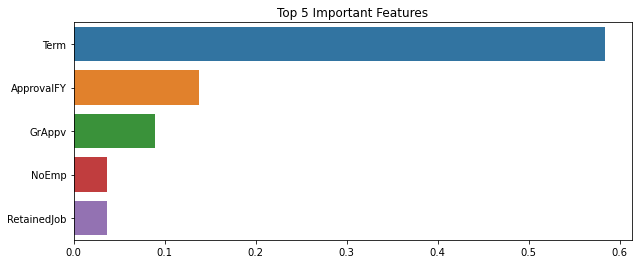

In [ ]:
feature_selection = pd.Series(rf_best.feature_importances_, index = X_train_eng.columns)
top5_feature = feature_selection.sort_values(ascending=False).head()

plt.figure(figsize=(10,4))
plt.title('Top 5 Important Features')
sns.barplot(x = top5_feature, y = top5_feature.index)
plt.show()

#### <a id = "7"> 4-3. Random Forests with Oversampling</a>

##### SMOTE

In [57]:
## original class distribution
np.bincount(y_train)

array([270568,  73904])

In [ ]:
smote = SMOTE(random_state=924)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=924)

X_train_eng = feature_eng_rf(X_train)
X_resampled, y_resampled = smote.fit_resample(X_train_eng, y_train)

In [ ]:
## resampled class distribution
np.bincount(y_resampled)

array([270568, 270568], dtype=int64)

0.9759616806126371
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     90194
           1       0.82      0.85      0.84     24631

    accuracy                           0.93    114825
   macro avg       0.89      0.90      0.90    114825
weighted avg       0.93      0.93      0.93    114825



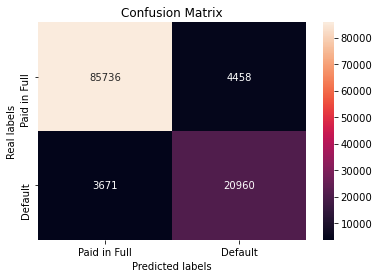

In [ ]:
rf_smote = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, min_samples_split=5)
rf_smote.fit(X_resampled, y_resampled)
print(rf_smote.score(X_resampled, y_resampled))


X_test_eng = feature_eng_rf(X_test)
smote_pred = rf_smote.predict(X_test_eng)

print(classification_report(y_test, smote_pred))

produce_confusion(1, 0, smote_pred, y_test)

In [ ]:
y_score_smote = rf_smote.predict_proba(X_test_eng)[:,1]

fp_sm, tp_sm, thresh_sm = roc_curve(y_test, y_score_smote)
print(f'roc_auc_score for random forests: {roc_auc_score(y_test, y_score_smote)}')

roc_auc_score for random forests: 0.9679182576368768


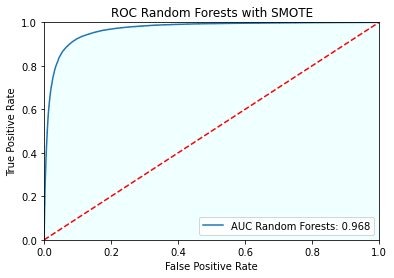

In [ ]:
plt.plot(fp_sm, tp_sm, label=f'AUC Random Forests: {round(roc_auc_score(y_test,y_score_smote),3)}')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Random Forests with SMOTE')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fp_sm, tp_sm, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

##### SMOTEENN

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=924)
print(f'before: {np.bincount(y_train)}')

smote_enn = SMOTEENN(random_state=924)

X_train_eng = feature_eng_rf(X_train)
X_res, y_res = smote_enn.fit_resample(X_train_eng, y_train)

print(f'after: {np.bincount(y_res)}')

before: [270568  73904]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


after: [217982 240579]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.9934447107364124
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     90194
           1       0.79      0.87      0.83     24631

    accuracy                           0.92    114825
   macro avg       0.88      0.91      0.89    114825
weighted avg       0.93      0.92      0.93    114825



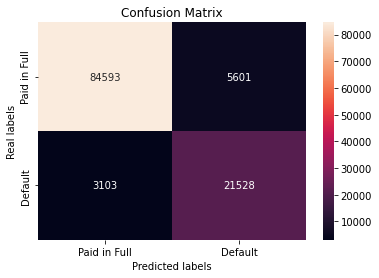

In [59]:
rf_smote_enn = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, min_samples_split=5)
rf_smote_enn.fit(X_res, y_res)
print(rf_smote_enn.score(X_res, y_res))


X_test_eng = feature_eng_rf(X_test)
smote_enn_pred = rf_smote_enn.predict(X_test_eng)

print(classification_report(y_test, smote_enn_pred))

produce_confusion(1, 0, smote_enn_pred, y_test)

In [60]:
y_score_smote_enn = rf_smote_enn.predict_proba(X_test_eng)[:,1]

fp_sm_e, tp_sm_e, thresh_sm_e = roc_curve(y_test, y_score_smote_enn)
print(f'roc_auc_score for random forests: {roc_auc_score(y_test, y_score_smote_enn)}')

roc_auc_score for random forests: 0.964606464511968


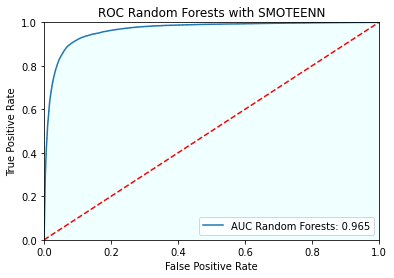

In [61]:
plt.plot(fp_sm_e, tp_sm_e, label=f'AUC Random Forests: {round(roc_auc_score(y_test,y_score_smote_enn),3)}')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Random Forests with SMOTEENN')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fp_sm_e, tp_sm_e, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

##### Borderline SMOTE

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=924)
print(f'before: {np.bincount(y_train)}')

borderline = BorderlineSMOTE(random_state=924)

X_train_eng = feature_eng_rf(X_train)
X_re, y_re = borderline.fit_resample(X_train_eng, y_train)

print(f'after: {np.bincount(y_re)}')

before: [270568  73904]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


after: [270568 270568]


0.9805076727477011
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     90194
           1       0.86      0.83      0.84     24631

    accuracy                           0.93    114825
   macro avg       0.91      0.90      0.90    114825
weighted avg       0.93      0.93      0.93    114825



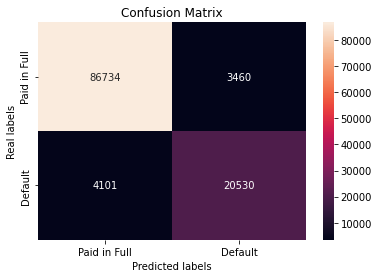

In [64]:
rf_border = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, min_samples_split=5)
rf_border.fit(X_re, y_re)
print(rf_border.score(X_re, y_re))


X_test_eng = feature_eng_rf(X_test)
border_pred = rf_border.predict(X_test_eng)

print(classification_report(y_test, border_pred))

produce_confusion(1, 0, border_pred, y_test)

In [66]:
y_score_border = rf_border.predict_proba(X_test_eng)[:,1]

fp_bsm, tp_bsm, thresh_bsm = roc_curve(y_test, y_score_border)
print(f'roc_auc_score for random forests: {roc_auc_score(y_test, y_score_border)}')

roc_auc_score for random forests: 0.9704727004639525


#### <a id = "8"> 4-4. Random Forests with Undersampling</a>

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=924)
print(f'before: {np.bincount(y_train)}')

tomek = TomekLinks(random_state=924)

X_train_eng = feature_eng_rf(X_train)
X_resa, y_resa = tomek.fit_resample(X_train_eng, y_train)

print(f'after: {np.bincount(y_resa)}')

before: [270568  73904]
after: [262275  73904]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.9700903387778534
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     90194
           1       0.86      0.83      0.84     24631

    accuracy                           0.93    114825
   macro avg       0.91      0.90      0.90    114825
weighted avg       0.93      0.93      0.93    114825



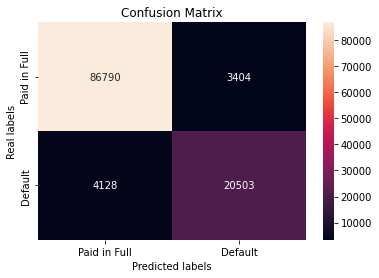

In [67]:
rf_tomek = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, min_samples_split=5)
rf_tomek.fit(X_resa, y_resa)
print(rf_tomek.score(X_resa, y_resa))


X_test_eng = feature_eng_rf(X_test)
tomek_pred = rf_tomek.predict(X_test_eng)

print(classification_report(y_test, tomek_pred))

produce_confusion(1, 0, tomek_pred, y_test)

### <a id = "9"> 5. Save the Best Model</a>

In [68]:
import pickle
with open('rf_smote_enn.pkl', 'wb') as f:
    pickle.dump(rf_smote_enn, f)